The objective of this notebook is to make sure that knit_circuits is working properly by visualising a simple example

knit_qiskit_circuits() takes three arguements:
    m: the number of beamsplitter modes
    BS_list: A list of itf beamsplitters
    circuits: A corresponding list of quantum circuits

In [1]:
import numpy as np
import sys
import interferometer as itf
from qiskit import QuantumCircuit
sys.path.append('../') # Add parent directory to the system path
from direct_decomposition import knit_qiskit_circuits

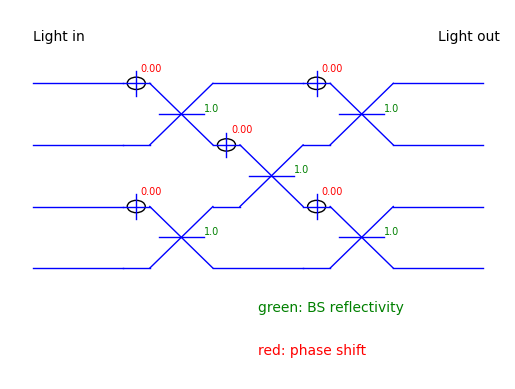

In [2]:
# Construct beamsplitters
bs1 = itf.Beamsplitter(mode1=1, mode2=2, theta=0, phi=0)
bs2 = itf.Beamsplitter(mode1=3, mode2=4, theta=0, phi=0)
bs3 = itf.Beamsplitter(mode1=2, mode2=3, theta=0, phi=0)
I = itf.Interferometer()
I.add_BS(bs1)
I.add_BS(bs2)
I.add_BS(bs3)
I.add_BS(bs1)
I.add_BS(bs2)
I.draw()

In [3]:
for bs in I.BS_list:
    print(bs)


 Beam splitter between modes 1 and 2: 
 Theta angle: 0.00 
 Phase: 0.00

 Beam splitter between modes 3 and 4: 
 Theta angle: 0.00 
 Phase: 0.00

 Beam splitter between modes 2 and 3: 
 Theta angle: 0.00 
 Phase: 0.00

 Beam splitter between modes 1 and 2: 
 Theta angle: 0.00 
 Phase: 0.00

 Beam splitter between modes 3 and 4: 
 Theta angle: 0.00 
 Phase: 0.00


In [4]:
bs_qubits = 4

c1 = QuantumCircuit(bs_qubits)
for i in range(bs_qubits):
    c1.h(i)
    c1.h(i)

c2 = QuantumCircuit(bs_qubits)
for i in range(bs_qubits):
    c2.x(i)
    c2.x(i)

c3 = QuantumCircuit(bs_qubits)
for i in range(bs_qubits):
    c3.z(i)
    c3.z(i)

circuits = [c1,c2,c3,c1,c2]

In [5]:
big_circuit = knit_qiskit_circuits(m=4, BS_list=I.BS_list, circuits=circuits)

In [6]:
print(big_circuit)

     ┌───┐┌───┐ ░            ░            ░ ┌───┐┌───┐ ░            ░ 
q_0: ┤ H ├┤ H ├─░────────────░────────────░─┤ H ├┤ H ├─░────────────░─
     ├───┤├───┤ ░            ░            ░ ├───┤├───┤ ░            ░ 
q_1: ┤ H ├┤ H ├─░────────────░────────────░─┤ H ├┤ H ├─░────────────░─
     ├───┤├───┤ ░            ░ ┌───┐┌───┐ ░ ├───┤├───┤ ░            ░ 
q_2: ┤ H ├┤ H ├─░────────────░─┤ Z ├┤ Z ├─░─┤ H ├┤ H ├─░────────────░─
     ├───┤├───┤ ░            ░ ├───┤├───┤ ░ ├───┤├───┤ ░            ░ 
q_3: ┤ H ├┤ H ├─░────────────░─┤ Z ├┤ Z ├─░─┤ H ├┤ H ├─░────────────░─
     └───┘└───┘ ░ ┌───┐┌───┐ ░ ├───┤├───┤ ░ └───┘└───┘ ░ ┌───┐┌───┐ ░ 
q_4: ───────────░─┤ X ├┤ X ├─░─┤ Z ├┤ Z ├─░────────────░─┤ X ├┤ X ├─░─
                ░ ├───┤├───┤ ░ ├───┤├───┤ ░            ░ ├───┤├───┤ ░ 
q_5: ───────────░─┤ X ├┤ X ├─░─┤ Z ├┤ Z ├─░────────────░─┤ X ├┤ X ├─░─
                ░ ├───┤├───┤ ░ └───┘└───┘ ░            ░ ├───┤├───┤ ░ 
q_6: ───────────░─┤ X ├┤ X ├─░────────────░────────────░─┤ X ├┤ X ├─░─
      